<Figure size 640x480 with 0 Axes>

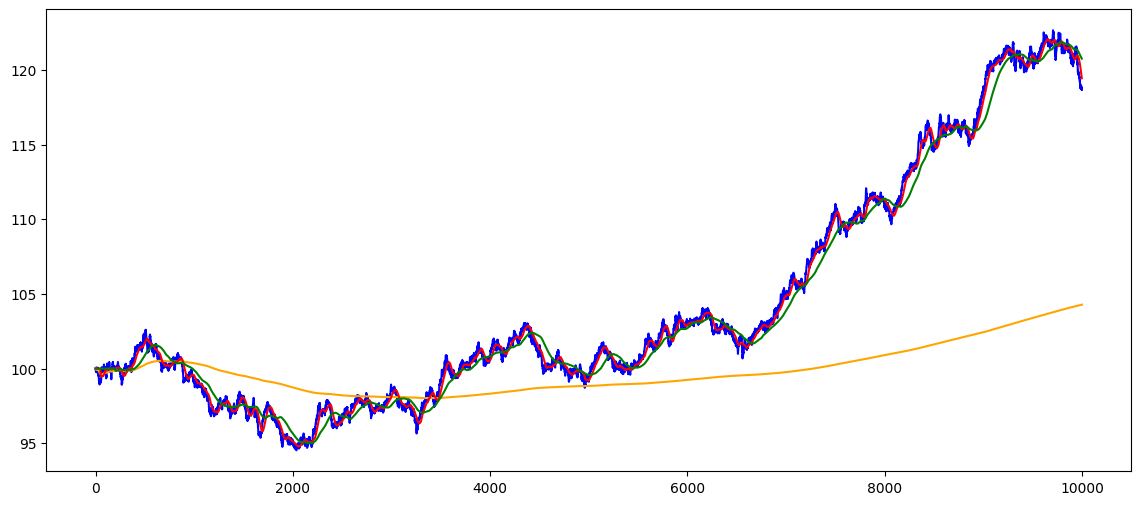

In [90]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()
FIG_WIDTH = 14
FIG_HEIGHT = 6

N = 1
D = 10000

#Setting Stock Parameters
mu = 0.05 / (N * D)
sigma = 0.001
dt = float(1/N)
S_0 = 100

S_t = [S_0]
Mean = [S_0]
Mean_50 = [S_0] * 50
Mean_200 = [S_0] * 200

A_t = [0] * 200
B_t = [0] * 200

for i in range(N*D):
    Z = np.random.standard_normal()
    dS = S_t[i]*(mu + sigma*Z)
    S_t.append(S_t[i] + dS)
    Mean.append(sum(S_t) / (i + 2))
    if (i >= 50):
        Mean_50.append(sum(S_t[-50:]) / 50)
    if (i >= 200):
        Mean_200.append(sum(S_t[-200:]) / 200)

plt.figure(0)
plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))

plt.plot(S_t,color='blue')       
plt.plot(Mean,color='orange')
plt.plot(Mean_50,color='red')
plt.plot(Mean_200,color='green')
#plt.plot(A_t)

for i in range(201,N*D-1):
    
    if (Mean_50[i] > Mean_200[i]):
        A_t.append(S_t[i] - S_t[i-1])
    
    if (Mean_50[i] < Mean_200[i]):
        #A_t.append(S_t[i-1] - S_t[i])
        A_t.append(0)
    
    B_t.append(sum(A_t))


# Buy when 50-day SMA moves above 200-day SMA
# Sell when 50-day SMA moves below 200-day SMA


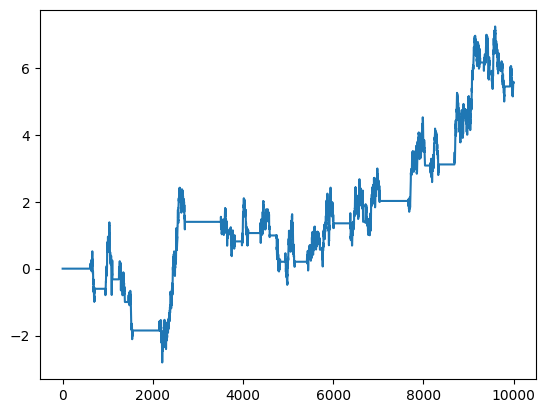

In [85]:
plt.figure(1)
plt.plot(B_t)
